# Help improve outcomes for shelter animals
https://www.kaggle.com/c/shelter-animal-outcomes

In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 70)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


About breeds: https://www.kaggle.com/msjgriffiths/shelter-animal-outcomes/breed-n-grams-visualization

In [5]:
df['OutcomeType'].value_counts(dropna=False, normalize=True)

Adoption           0.402896
Transfer           0.352501
Return_to_owner    0.179056
Euthanasia         0.058177
Died               0.007370
Name: OutcomeType, dtype: float64

In [6]:
df['SexuponOutcome'].value_counts(dropna=False)

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
NaN                 1
Name: SexuponOutcome, dtype: int64

In [7]:
df['SexuponOutcome'] = df['SexuponOutcome'].fillna('Unknown')
df_test['SexuponOutcome'] = df_test['SexuponOutcome'].fillna('Unknown')

In [8]:
df['SexuponOutcome'].value_counts(dropna=False)

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1094
Name: SexuponOutcome, dtype: int64

In [9]:
df['SexuponOutcome'] = df['SexuponOutcome'].astype('str')
df_test['SexuponOutcome'] = df_test['SexuponOutcome'].astype('str')

In [10]:
def detect_sterilization(x):
    if 'Intact' in x:
        return 'Intact'
    if 'Spayed' in x or 'Neutered' in x:
        return 'Neutered'
    return 'Unknown'
def detect_gender(x):
    if 'Male' in x:
        return 'Male'
    if 'Female' in x:
        return 'Female'
    return 'Unknown'
df['Sterilization'] = df['SexuponOutcome'].map(detect_sterilization)# применяет функцию на каждую строку
df['Gender'] = df['SexuponOutcome'].map(detect_gender)

df_test['Sterilization'] = df['SexuponOutcome'].map(detect_sterilization)
df_test['Gender'] = df['SexuponOutcome'].map(detect_gender)

In [11]:
df['Sterilization'].value_counts()

Neutered    18599
Intact       7036
Unknown      1094
Name: Sterilization, dtype: int64

In [12]:
df['Gender'].value_counts()

Male       13304
Female     12331
Unknown     1094
Name: Gender, dtype: int64

In [13]:
sterilization = pd.get_dummies(df['Sterilization'], prefix='Sterilization', drop_first=True)
df = pd.concat([df, sterilization], axis=1)

gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df, gender], axis=1)

sterilization = pd.get_dummies(df_test['Sterilization'], prefix='Sterilization', drop_first=True)
df_test = pd.concat([df_test, sterilization], axis=1)
# gender = pd.get_dummies(df_test['Gender'], prefix='Gender', drop_first=True)
gender = pd.get_dummies(df_test['Gender'], prefix='Gender')
df_test = pd.concat([df_test, gender], axis=1)

Also check: <a href='http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a>

And this one: https://github.com/pandas-dev/pandas/issues/8918

In [14]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sterilization,Gender,Sterilization_Neutered,Sterilization_Unknown,Gender_Female,Gender_Male,Gender_Unknown
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Neutered,Male,1,0,0,1,0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Neutered,Female,1,0,1,0,0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Neutered,Male,1,0,0,1,0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Intact,Male,0,0,0,1,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Neutered,Male,1,0,0,1,0
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,Intact,Female,0,0,1,0,0
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,Intact,Male,0,0,0,1,0
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,Unknown,Unknown,0,1,0,0,1
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,Neutered,Female,1,0,1,0,0
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,Neutered,Female,1,0,1,0,0


In [15]:
del df['Sterilization_Unknown']
del df_test['Sterilization_Unknown']

In [16]:
df['AnimalType'].value_counts(dropna=False)
df_test['AnimalType'].value_counts(dropna=False)

Dog    6656
Cat    4800
Name: AnimalType, dtype: int64

In [17]:
df['AnimalType'] = df['AnimalType'].map({'Dog': 0, 'Cat': 1})
df_test['AnimalType'] = df_test['AnimalType'].map({'Dog': 0, 'Cat': 1})

In [18]:
df['AgeuponOutcome'].value_counts(dropna=False)

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
7 months      288
9 years       288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
NaN            18
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

In [19]:
df['AgeuponOutcome'] = df['AgeuponOutcome'].fillna('unknown')
df_test['AgeuponOutcome'] = df_test['AgeuponOutcome'].fillna('unknown')

Unify age:

In [20]:
def get_age_in_weeks(age_str):
    if age_str == 'unknown':
        return -50
    number, time_period = age_str.split()
    multiplicator = 1
    if time_period == 'years':
        multiplicator = 365 / 7
    elif time_period == 'months':
        multiplicator = 30 / 7
    return int(number) * multiplicator

df['AgeuponOutcome'] = df['AgeuponOutcome'].map(get_age_in_weeks)
df_test['AgeuponOutcome'] = df_test['AgeuponOutcome'].map(get_age_in_weeks)

In [21]:
training_columns = ['AnimalType', 'AgeuponOutcome'] + \
    [x for x in df.columns if 'Gender_' in x] + \
    [x for x in df.columns if 'Sterilization_' in x]

In [22]:
df['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [23]:
outcomes2numbers = {'Adoption': 0, 'Transfer': 1, 'Return_to_owner': 2, 'Euthanasia': 3, 'Died': 4}
df['OutcomeType']  

0        Return_to_owner
1             Euthanasia
2               Adoption
3               Transfer
4               Transfer
5               Transfer
6               Transfer
7               Transfer
8               Adoption
9               Adoption
10              Transfer
11              Adoption
12              Adoption
13       Return_to_owner
14       Return_to_owner
15              Adoption
16              Transfer
17              Transfer
18              Transfer
19       Return_to_owner
20              Transfer
21              Transfer
22              Adoption
23              Adoption
24       Return_to_owner
25              Transfer
26              Adoption
27              Adoption
28              Adoption
29       Return_to_owner
              ...       
26699         Euthanasia
26700    Return_to_owner
26701           Transfer
26702               Died
26703           Transfer
26704           Transfer
26705           Transfer
26706           Adoption
26707         Euthanasia


//anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


20 0.632421714243
40 0.633132552658
100 0.633805978525
200 0.633469265592
500 0.634441991844
1000 0.635115417711


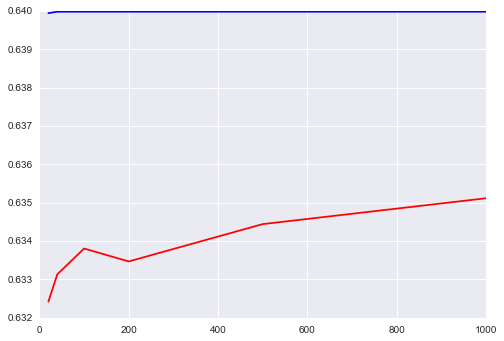

In [24]:
test_scores = []
train_scores = []
values_to_try = [20, 40, 100, 200, 500, 1000]

for n_trees in values_to_try:
    clf = RandomForestClassifier(random_state=42, n_estimators=n_trees, oob_score=True, n_jobs=-1)
    clf.fit(df[training_columns], df['OutcomeType'])
    test_scores.append(clf.oob_score_)
    train_scores.append(clf.score(df[training_columns], df['OutcomeType']))


    print n_trees, clf.oob_score_
    
plot(values_to_try, test_scores, 'r')
plot(values_to_try, train_scores, 'b')

### Lets try to simplify color feature:
colors feature didn't contribute any value

In [25]:
def check_black(color):
    if ('Black' in color) or ('Sable' in color):
        return 1
    else:
        return 0

def check_white(color):
    if 'White' in color:
        return 1
    else:
        return 0

def check_brown(color):
    if ('Brown' in color) or ('Chocolate' in color):
        return 1
    else:
        return 0

def check_orange(color):
    if ('Orange' in color) or ('Red' in color):
        return 1
    else:
        return 0

def check_gray(color):
    if 'Blue' in color or ('Gray' in color) or ('Silver' in color):
        return 1
    else:
        return 0

def check_tan(color):
    if ('Tan' in color) or ('Yellow' in color) or ('Cream' in color) or ('Buff' in color) or ('Fawn' in color) or ('Apricot' in color) or ('Gold' in color):
        return 1
    else:
        return 0

def check_tricolor(color):
    if ('Tricolor' in color) or ('/' in color):
        return 1
    else:
        return 0
    
df['Black'] = df['Color'].map(check_black)
df['White'] = df['Color'].map(check_white)
df['Brown'] = df['Color'].map(check_brown)
df['Orange'] = df['Color'].map(check_orange)
df['Gray'] = df['Color'].map(check_gray)
df['Tan'] = df['Color'].map(check_tan)
df['Tricolor'] = df['Color'].map(check_tricolor)

In [26]:
def count_colors(color):
    if ('Tricolor' in color) or ('Torbie' in color) or ('Calico' in color) or ('Tortie' in color) or ('Brindle' in color): return 2
    if ('/' in color) or ('Point' in color) or ('Sable' in color) or ('Tabby' in color): return 1
    return 0

df['Colors Number'] = df['Color'].apply(count_colors)

### Let's add size (weight) of the dog according to it's breed

I added one more table with mean breed weight from the intenet.
That's where magic happens, this feature gave me huge boost in score and I got first place class.

In [27]:
breed_size = pd.read_csv('breed_size.csv')

def drop_gender(text):
    text = text.replace('Male:', '')
    text = text.replace('Female:', '')
    temp = text.replace(' ', '')
    text = text.replace('lbs', '')
    return text

breed_size['Male'] = breed_size['Male'].apply(drop_gender)
breed_size['Female'] = breed_size['Female'].apply(drop_gender)

def weight_mean(text):
    numbers_arr = []
    numbers = text.split('-')
    for number in numbers:
        if number.strip().isdigit():
            numbers_arr.append(int(number))
    return np.mean(numbers_arr)

breed_size['Male'] = breed_size['Male'].apply(weight_mean)
breed_size['Female'] = breed_size['Female'].apply(weight_mean)

In [28]:
df['Breed'] = df['Breed']

def find_size_male(breed):
    breed = breed.replace('Shorthair', '')
    breed = breed.replace('Longhair', '')
    breed = breed.replace('Mix', '')
    breed = breed.replace('/', ' ')            
    temp = (breed.split(None)[:2])
    short_breed = str()
    for word in temp:
        short_breed += word + ' '
    short_breed = short_breed.strip()

    weight = breed_size[breed_size['Breed'].str.contains(short_breed)]['Male']

    if(len(weight) == 1):
        return int(weight)
    else:
        return -50

df.loc[df['Gender_Female'] == 0, 'Size'] = df['Breed'].apply(find_size_male)

In [29]:
def find_size_female(breed):
    breed = breed.replace('Shorthair', '')
    breed = breed.replace('Longhair ', '')
    breed = breed.replace('Mix', '')
    breed = breed.replace('/', ' ')            
    temp = (breed.split(None)[:2])
    short_breed = str()
    for word in temp:
        short_breed += word + ' '
    short_breed = short_breed.strip()

    weight = breed_size[breed_size['Breed'].str.contains(short_breed)]['Female']

    if(len(weight) == 1):
        return int(weight)
    else:
        return -50

df.loc[df['Gender_Female'] == 1, 'Size'] = df['Breed'].apply(find_size_female)

### Simplify size feature to get categories (e.g. tiny, small, medium, big, giant)

In [30]:
def simplify_size(weight):
    if weight < 0: return -10
    if weight < 20: return 0
    if weight < 50: return 1
    if weight < 80: return 2
    if weight < 110: return 3
    return 4

df['Size Simplified'] = df['Size'].apply(simplify_size)

If animal has name it's a whole different story, and this feature worked really well.

In [31]:
df['Has Name'] = df['Name'].isnull()
df['Has Name'] = df['Has Name'].map({True: 1, False: 0})

### Let's also check for breed purity, it is sometimes important for people.

In [32]:
df['Breed'] = df['Breed']
def check_mix(breed):
    if ('/' in breed) or ('Mix' in breed):
        return 1
    else:
        return 0

df['Mix'] = df['Breed'].apply(check_mix)

### Dangerous dogs are misunderstood and people don't like them.

In [33]:
df['Breed'] = df['Breed']
def is_bully(breed):
#     if ('Bull' in breed) or ('Doberman' in breed) or ('Rottweiler' in breed) or ('Husky' in breed) or (('Staffordshire' in breed) and ('Terrier' in breed)):
    if ('Bull' in breed) or ('Doberman' in breed) or ('Rottweiler' in breed) or ('Husky' in breed):
        return 1
    else:
        return 0

df['Bully'] = df['Breed'].apply(is_bully)

In [34]:
def simplify_age(age):
    if age < 1: return -10
    if age < 48: return 0     # меньше года
    if age < 200: return 1    # 4 года
    if age < 350: return 2    # 10 лет
    return 3

df['Age Simplified'] = df['AgeuponOutcome'].apply(simplify_age)

### Binarize outcomes to check correlation visually.

In [35]:
def check_return(outcome):
    if 'Return' in outcome: return 1
    return 0
df['Return'] = df['OutcomeType'].apply(check_return)

def check_euthanasia(outcome):
    if 'Euthanasia' in outcome: return 1
    return 0
df['Euthanasia'] = df['OutcomeType'].apply(check_euthanasia)

def check_adoption(outcome):
    if 'Adoption' in outcome: return 1
    return 0
df['Adoption'] = df['OutcomeType'].apply(check_adoption)

def check_transfer(outcome):
    if 'Transfer' in outcome: return 1
    return 0
df['Transfer'] = df['OutcomeType'].apply(check_transfer)

def check_died(outcome):
    if 'Died' in outcome: return 1
    return 0
df['Died'] = df['OutcomeType'].apply(check_died)

### Add info about coat (long/short)
It didn't work out, because only half of anymals have this information.
Potetntially this information could be extracted from breed.

In [36]:
def check_longhair(breed):
    if 'Longhair' in breed: return 1
    if 'Shorthair' in breed: return 0
    return -10

df['Longhair'] = df['Breed'].apply(check_longhair)

In [37]:
len(df[df['Longhair'] == -10])

14523

### Let's make visual analysis!

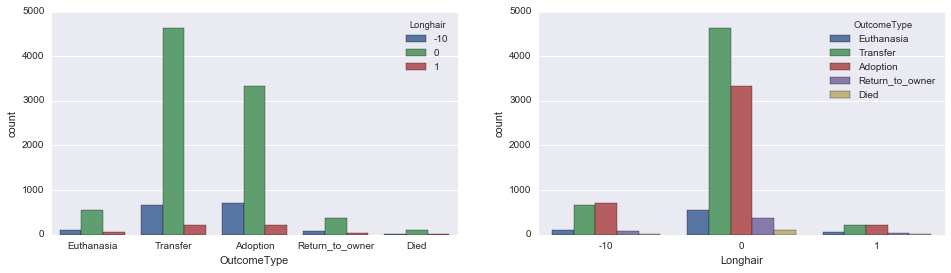

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df[df['AnimalType'] == 1], x='OutcomeType',hue='Longhair', ax=ax1)
sns.countplot(data=df[df['AnimalType'] == 1], x='Longhair',hue='OutcomeType', ax=ax2)

long haired animals are less desirable

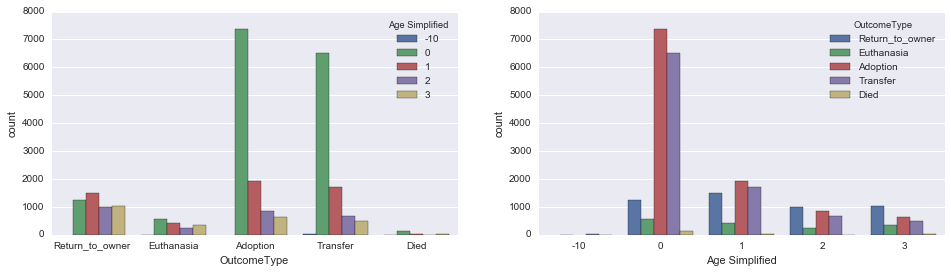

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='OutcomeType',hue='Age Simplified', ax=ax1)
sns.countplot(data=df, x='Age Simplified',hue='OutcomeType', ax=ax2)

young are adopted frequently, and older ones are returned to owner in many cases

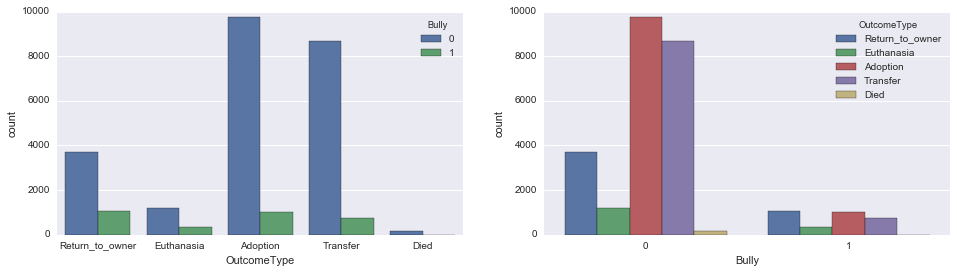

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='OutcomeType',hue='Bully', ax=ax1 )
sns.countplot(data=df, x='Bully',hue='OutcomeType', ax=ax2)

only owners are interested in dangerous dog breeds

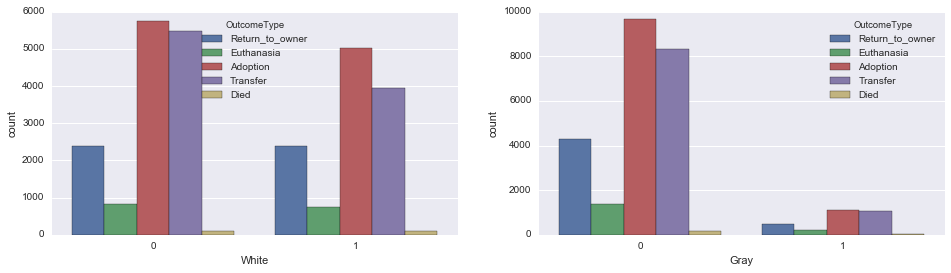

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='White',hue='OutcomeType', ax=ax1)
sns.countplot(data=df, x='Gray',hue='OutcomeType', ax=ax2)

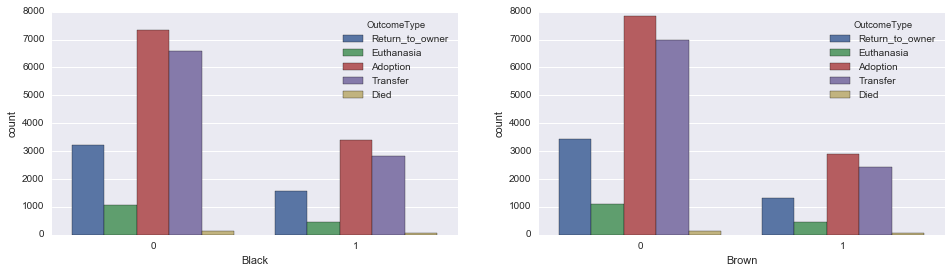

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='Black',hue='OutcomeType', ax=ax1)
sns.countplot(data=df, x='Brown',hue='OutcomeType', ax=ax2)

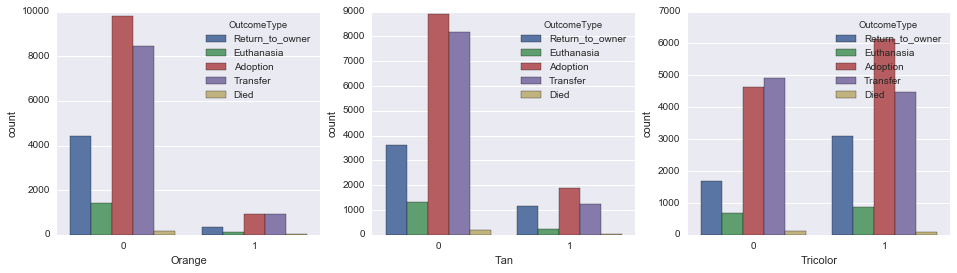

In [43]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
sns.countplot(data=df, x='Orange',hue='OutcomeType', ax=ax1)
sns.countplot(data=df, x='Tan',hue='OutcomeType', ax=ax2)
sns.countplot(data=df, x='Tricolor',hue='OutcomeType', ax=ax3)

it seems that there is no favorite coat color

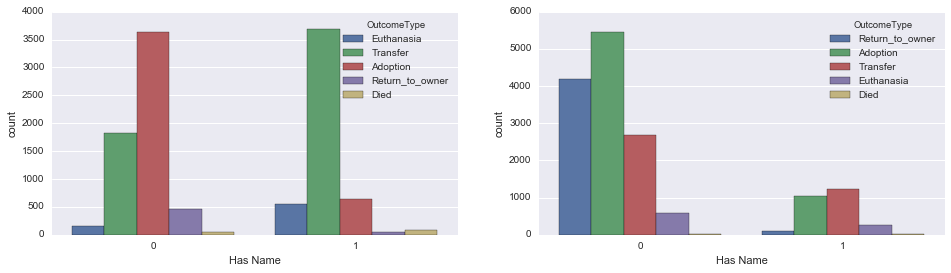

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df[df['AnimalType'] == 1], x='Has Name',hue='OutcomeType', ax=ax1)
sns.countplot(data=df[df['AnimalType'] == 0], x='Has Name',hue='OutcomeType', ax=ax2)

name feature is upside down: 0 = True, 1 = False

only animal with name could be returned to owner, and nameless animals are rarely adopted

In [45]:
df[['Name', 'Has Name']].head()

,Name,Has Name
0,Hambone,0
1,Emily,0
2,Pearce,0
3,NaN,1
4,NaN,1


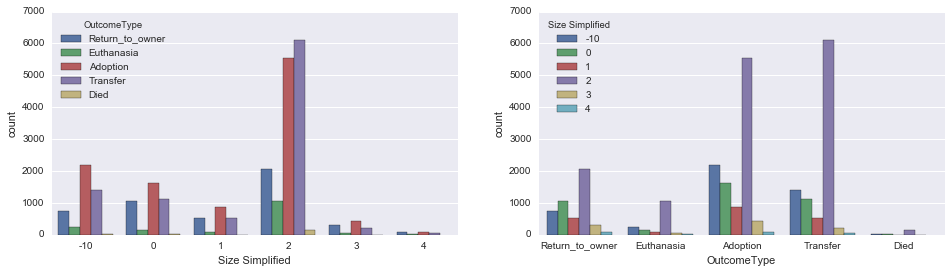

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='Size Simplified',hue='OutcomeType', ax=ax1)
sns.countplot(data=df, x='OutcomeType',hue='Size Simplified', ax=ax2)

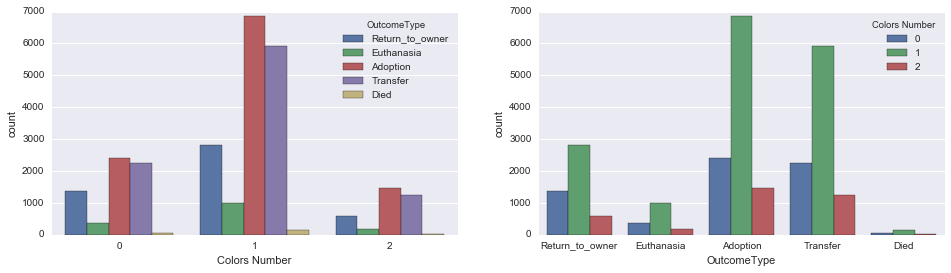

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='Colors Number',hue='OutcomeType', ax=ax1)
sns.countplot(data=df, x='OutcomeType',hue='Colors Number', ax=ax2)

number of colors doesn't mean anything

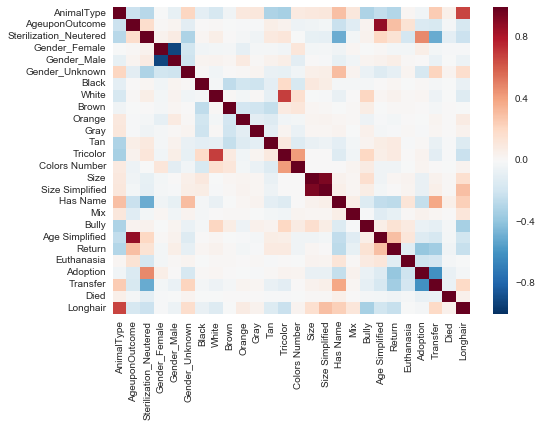

In [48]:
sns.heatmap(df.corr())

In [49]:
correlation = df.corr()
for column in correlation.columns:
    print column, '             ', sum(abs(correlation.tail()[column]))

AnimalType               1.03894363477
AgeuponOutcome               0.641126456845
Sterilization_Neutered               1.47176674043
Gender_Female               0.139823940596
Gender_Male               0.142630632366
Gender_Unknown               0.635891018782
Black               0.11025414729
White               0.21201589289
Brown               0.0368916751002
Orange               0.120954501136
Gray               0.0854291067506
Tan               0.2450362759
Tricolor               0.380284903584
Colors Number               0.0807086114435
Size               0.323722724211
Size Simplified               0.472859428019
Has Name               1.05041488058
Mix               0.197397127069
Bully               0.601674210808
Age Simplified               0.635431934385
Return               1.11700620883
Euthanasia               1.40962986058
Adoption               1.90100170727
Transfer               2.05189108624
Died               1.20360310165
Longhair               1.26734060822


In [50]:
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = ['Sterilization_Neutered', 'Has Name', 'AnimalType', 'Bully', 'Mix', 'Colors Number', 'Tan', 'Longhair']
real_data = ['AgeuponOutcome', 'Size', 'Size Simplified', 'Age Simplified']


encoder = DV(sparse = False)
df_cat_oh = encoder.fit_transform(df[categorial_data].T.to_dict().values())

df_new = np.hstack((df[real_data], df_cat_oh))

### Algorithm was fixed in this competition

Trees: 40 Score: 0.647835684088
Trees: 150 Score: 0.647985334281
Trees: 300 Score: 0.64719967077
Trees: 450 Score: 0.649257360919
Trees: 700 Score: 0.649594073852
Trees: 800 Score: 0.649407011112
Trees: 950 Score: 0.649594073852
Max score: 0.649594073852
mix_columns = ['Sterilization_Neutered', 'Has Name', 'AgeuponOutcome', 'Age Simplified', 'AnimalType', 'Bully', 'Size', 'Mix']
CPU times: user 1min 53s, sys: 6.52 s, total: 1min 59s
Wall time: 1min 2s


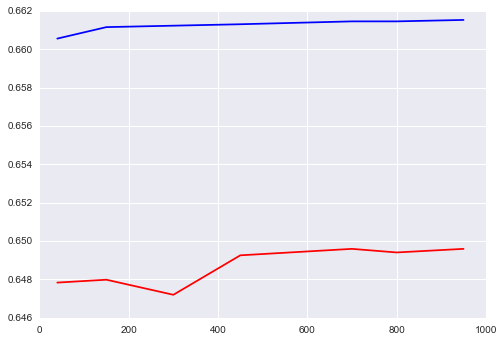

In [51]:
%%time
cat_test_scores = []
cat_train_scores = []
dog_test_scores = []
dog_train_scores = []
mix_test_scores = []
mix_train_scores = []

values_to_try = [40, 150, 300, 450, 700, 800, 950]




mix_columns = ['Sterilization_Neutered', 'Has Name', 'AgeuponOutcome', 'Age Simplified', 'AnimalType', 'Bully', 'Size', 'Mix']

for n_trees in values_to_try:
    clf = RandomForestClassifier(n_estimators=n_trees, min_samples_split=80, max_depth=22, random_state=42, n_jobs=-1, oob_score=True, criterion='gini')
    clf.fit(df[mix_columns], df['OutcomeType'])
#             clf.fit(df_new, df['OutcomeType'])
    mix_test_scores.append(clf.oob_score_)
    mix_train_scores.append(clf.score(df[mix_columns], df['OutcomeType']))

    print 'Trees:', n_trees, 'Score:', clf.oob_score_

plot(values_to_try, mix_test_scores, 'r')
plot(values_to_try, mix_train_scores, 'b')


print 'Max score:', max(mix_test_scores) 
print 'mix_columns =', mix_columns

### Here we decided that time of outcome is not data leek and we could use it, OK

In [52]:
import datetime, time
def date_str2timestamp(line):
    d = datetime.datetime.strptime(line, '%Y-%m-%d %H:%M:%S')
    return int(time.mktime(d.timetuple()))

df['Timestamp'] = df['DateTime'].map(date_str2timestamp)

In [55]:
def date_str2year(line):
    return int(line.split('-')[0])
    
def date_str2month(line):
    return int(line.split('-')[1])

def date_str2day(line):
    return int(line.split('-')[2].split()[0])

def date_str2clock(line):
    hours, minutes = line.split()[1].split(':')[:2]
    return int(minutes) + int(hours) * 60

def date_str2weekday(line):
    return datetime.datetime.strptime(line, '%Y-%m-%d %H:%M:%S').weekday()

def date_str2hours(line):
    hours, minutes = line.split()[1].split(':')[:2]
    return int(hours)

df['year'] = df['DateTime'].map(date_str2year)
df['month'] = df['DateTime'].map(date_str2month)
df['day'] = df['DateTime'].map(date_str2day)
df['clock'] = df['DateTime'].map(date_str2clock)
df['weekday'] = df['DateTime'].map(date_str2weekday)
df['hour'] = df['DateTime'].map(date_str2hours)

700 0.703393318119
1000 0.703505555763
Max score: 0.703505555763
mix_columns = ['Sterilization_Neutered', 'Has Name', 'AgeuponOutcome', 'Age Simplified', 'AnimalType', 'Bully', 'Size', 'Mix', 'month', 'day', 'hour', 'clock', 'weekday']


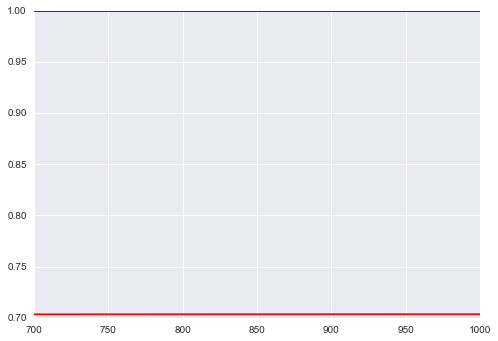

In [56]:
cat_test_scores = []
cat_train_scores = []
dog_test_scores = []
dog_train_scores = []
mix_test_scores = []
mix_train_scores = []

values_to_try = [700, 1000]
# mix_columns = ['Sterilization_Neutered', 'Has Name', 'AgeuponOutcome', 'Age Simplified', 'AnimalType', 'Bully', 'Size', 'Mix', 'month', 'day', 'clock', 'weekday']
mix_columns = ['Sterilization_Neutered', 'Has Name', 'AgeuponOutcome', 'Age Simplified', 'AnimalType', 'Bully', 'Size', 'Mix', 'month', 'day', 'hour', 'clock', 'weekday']


for n_trees in values_to_try:
    clf = RandomForestClassifier(random_state=42, n_estimators=n_trees, oob_score=True, n_jobs=-1, criterion='gini')
    clf.fit(df[mix_columns], df['OutcomeType'])
    mix_test_scores.append(clf.oob_score_)
    mix_train_scores.append(clf.score(df[mix_columns], df['OutcomeType']))
    
    print n_trees, clf.oob_score_

plot(values_to_try, mix_test_scores, 'r')
plot(values_to_try, mix_train_scores, 'b')
print 'Max score:', max(mix_test_scores) 
print 'mix_columns =', mix_columns